# Sprint 11 – User Behavior Analysis for a Food-Delivery Startup App
## 1.0 - Step 1 - Opening the file and reading general information

In [85]:
import pandas as pd
# Load the dataset
data = pd.read_csv('../data/logs_exp_us.csv', sep='\t')

# Preview the first rows
data.head()


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [86]:
# Check general info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [87]:
# Check the first rows
print(data.head())

# Check structure and dtypes
print(data.info())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


**What I did:**

•	Loaded the logs_exp_us.csv dataset with users’ in-app event logs.

•	Fixed the initial read by specifying the correct delimiter (\t), since the columns were initially merged into one.

•	Previewed the first rows with .head() and used .info() to understand the data structure.

•	Confirmed the DataFrame has 244,126 records and 4 columns: EventName, DeviceIDHash, EventTimestamp, and ExpId. There are no missing values.



**What we can conclude:**

•	The dataset was loaded successfully and is ready for pre-processing.

•	The absence of missing values allows us to proceed without additional cleaning at this stage.

•	The data are correctly structured with essential columns for event-, user- and experiment-level analyses.


## 2.0 - Step 2 – Prepare the data for analysis

In [88]:
# Rename columns (optional, if you'd like simpler names)
data.columns = ['event_name', 'user_id', 'timestamp', 'exp_id']

# Convert UNIX timestamp to datetime
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Create a date-only column
data['date'] = data['datetime'].dt.date

# Verify result
print(data.head())
print(data.info())

                event_name              user_id   timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257  1564029816     246   
1         MainScreenAppear  7416695313311560658  1564053102     246   
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248   
3         CartScreenAppear  3518123091307005509  1564054127     248   
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248   

             datetime        date  
0 2019-07-25 04:43:36  2019-07-25  
1 2019-07-25 11:11:42  2019-07-25  
2 2019-07-25 11:28:47  2019-07-25  
3 2019-07-25 11:28:47  2019-07-25  
4 2019-07-25 11:48:42  2019-07-25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3

**What I did:**

•	Renamed columns to more readable names: EventName → event_name, DeviceIDHash → user_id, EventTimestamp → timestamp, ExpId → exp_id.

•	Converted the UNIX timestamp to datetime to facilitate temporal analyses.


•	Created a date column containing only the date (no time).

•	Checked data types and confirmed there are no missing values.

**What we can conclude:**

•	The data are now tidy, standardised and ready for analysis.

•	Adding datetime and date enables clearer time-based analyses.


•	The dataset is complete, with no missing values, supporting reliable downstream analyses.
## 3.0 – Step 3 – Exploratory checks
### 3.1 – How many events are in the logs?


In [89]:
total_events = data.shape[0]
print(f"Total events: {total_events}")

Total events: 244126


###  3.2 – How many unique users?

In [90]:
unique_users = data['user_id'].nunique()
print(f"Total unique users: {unique_users}")


Total unique users: 7551


###  3.3 – Average number of events per user

In [91]:
avg_events_per_user = total_events / unique_users
print(f"Average events per user: {avg_events_per_user:.2f}")


Average events per user: 32.33


### 3.4 – What period do the data cover?

In [92]:
data_min = data['datetime'].min()
data_max = data['datetime'].max()
print(f"Data period: {data_min} to {data_max}")

Data period: 2019-07-25 04:43:36 to 2019-08-07 21:15:17


### 3.5 - Histogram by date

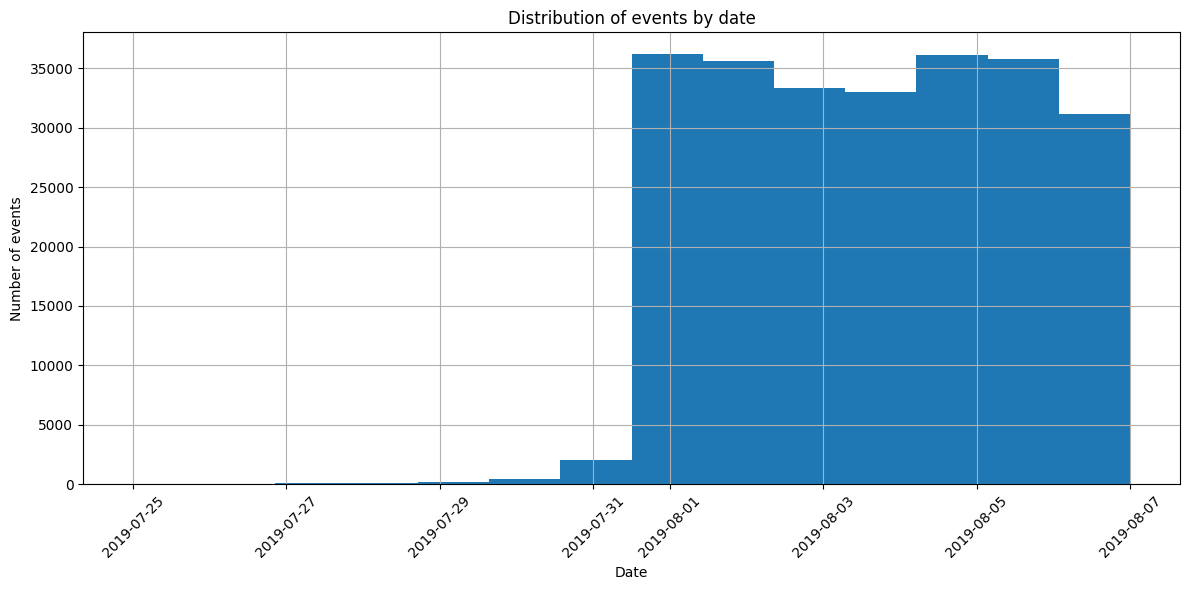

In [93]:
import matplotlib.pyplot as plt

# ensure datetime dtype
data['date'] = pd.to_datetime(data['date'])

data['date'].hist(bins=len(data['date'].unique()), figsize=(12, 6))
plt.title('Distribution of events by date')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

**What I did:**

•	Computed the total number of events: 244,126 records.

•	Calculated the number of unique users based on user_id: 7,551 distinct users.


•	Calculated the average events per user: 32.33 events/user.

•	Identified the coverage period: from 25 July 2019 to 7 August 2019.


•	Created a histogram by date to inspect temporal distribution.

**What we can conclude:**

•	The event count is high and the per-user average suggests substantial engagement within the period.

•	The distribution shows the data become consistent from 1 August onwards, with earlier dates sparse — likely due to technical reasons or internal testing.

•	We should consider trimming data before 2019-08-01 to avoid biasing later analyses.


### 3.6 – Trim to the reliable period


In [94]:
# Filter only data from 1 August 2019 onwards
filtered_data = data[data['date'] >= '2019-08-01']

# Check how many events and users were retained
remaining_events = filtered_data.shape[0]
remaining_users = filtered_data['user_id'].nunique()

print(f"Events retained after cut: {remaining_events}")
print(f"Unique users retained: {remaining_users}")


Events retained after cut: 241298
Unique users retained: 7534


**What I did:**

Based on the histogram, I identified that data prior to 1 August 2019 are sparse and inconsistent. I therefore filtered the DataFrame to keep only events from that date onwards and then checked how many events and users were preserved.

**What we can conclude:**

•	241,298 events were retained; under 1.2% were discarded — a minimal loss.

•	7,534 unique users remained, a reduction of only 17 relative to the original total.


•	From 1 August onwards, the data are denser and more complete, providing greater reliability for subsequent analyses.

•	This trimming is essential to avoid bias from incomplete sampling and to maintain statistical consistency.



### 3.7 – Check the distribution of experiment groups

In [95]:
# Distribution of users by experiment group
users_per_group = (
    filtered_data
    .groupby('exp_id')['user_id']
    .nunique()
    .reset_index()
)
users_per_group.columns = ['exp_id', 'unique_users']
print(users_per_group)

   exp_id  unique_users
0     246          2484
1     247          2513
2     248          2537


**What I did:**

Grouped the filtered data by exp_id to see how many unique users belong to each experimental group (246, 247, 248), ensuring all three groups are represented after the date cut.

**What we can conclude:**

All groups have similar user distributions, with small variations:
•	Group 246: 2,484 users

•	Group 247: 2,513 users


•	Group 248: 2,537 users

This indicates the groups were properly balanced in the A/A/B experiment, which is crucial for valid statistical comparisons. We can proceed confidently with the analysis.


## 4.0 – Step 4 – Event funnel study
### 4.1 – Which events appear in the logs and how often?


In [96]:
# Count the frequency of each event
event_frequency = (
    filtered_data['event_name']
    .value_counts()
    .reset_index()
)
event_frequency.columns = ['event_name', 'frequency']
print(event_frequency)



                event_name  frequency
0         MainScreenAppear     117431
1       OffersScreenAppear      46350
2         CartScreenAppear      42365
3  PaymentScreenSuccessful      34113
4                 Tutorial       1039


### 4.2 – How many users performed each event?

In [97]:
users_by_event = (
    filtered_data
    .groupby('event_name')['user_id']
    .nunique()
    .reset_index()
)
users_by_event.columns = ['event_name', 'unique_users']
users_by_event['proportion'] = users_by_event['unique_users'] / filtered_data['user_id'].nunique()
users_by_event = users_by_event.sort_values(by='unique_users', ascending=False)
print(users_by_event)

                event_name  unique_users  proportion
1         MainScreenAppear          7419    0.984736
2       OffersScreenAppear          4593    0.609636
0         CartScreenAppear          3734    0.495620
3  PaymentScreenSuccessful          3539    0.469737
4                 Tutorial           840    0.111495


### 4.3 – Compute conversion rate between funnel steps

In [98]:
# First occurrence of each event per user (sequential funnel)
funnel = filtered_data.pivot_table(
    index='user_id',
    columns='event_name',
    values='datetime',
    aggfunc='min'
)

# Funnel steps in the correct order (increasing time)
step_1 = ~funnel['MainScreenAppear'].isna()
step_2 = step_1 & (funnel['OffersScreenAppear'] > funnel['MainScreenAppear'])
step_3 = step_2 & (funnel['CartScreenAppear'] > funnel['OffersScreenAppear'])
step_4 = step_3 & (funnel['PaymentScreenSuccessful'] > funnel['CartScreenAppear'])

# Users at each step
n_main = funnel[step_1].shape[0]
n_offers = funnel[step_2].shape[0]
n_cart = funnel[step_3].shape[0]
n_payment = funnel[step_4].shape[0]

# Step-to-step conversions
conv_offers = n_offers / n_main
conv_cart = n_cart / n_offers
conv_payment = n_payment / n_cart

# Results
print(f"Users at MainScreenAppear: {n_main}")
print(f"Users at OffersScreenAppear: {n_offers} — Conversion: {conv_offers:.2%}")
print(f"Users at CartScreenAppear: {n_cart} — Conversion: {conv_cart:.2%}")
print(f"Users at PaymentScreenSuccessful: {n_payment} — Conversion: {conv_payment:.2%}")

conv_total = n_payment / n_main
print(f"Total funnel conversion: {conv_total:.2%}")


Users at MainScreenAppear: 7419
Users at OffersScreenAppear: 4201 — Conversion: 56.62%
Users at CartScreenAppear: 1767 — Conversion: 42.06%
Users at PaymentScreenSuccessful: 454 — Conversion: 25.69%
Total funnel conversion: 6.12%


**What I did:**

•	Counted the frequency of each event using value_counts() to identify the most common ones.

•	Calculated how many unique users performed each action and their proportion of the total.


•	Modelled the event funnel enforcing temporal sequence: MainScreenAppear → OffersScreenAppear → CartScreenAppear → PaymentScreenSuccessful.

•	Used pivot_table() to capture the first occurrence of each event per user.


•	Applied filters to ensure events occurred in strictly increasing time order.

•	Calculated conversion rates between steps based on these sequential users.


**What we can conclude:**

•	The most common event is MainScreenAppear, followed by OffersScreenAppear, CartScreenAppear, and PaymentScreenSuccessful.

•	Conversion from main screen to offers is 56.6%, indicating a notable drop early in the journey.


•	Only 42% of users who view offers reach the basket/cart.

•	The largest loss is between cart and payment: only 25.7% complete payment after adding to cart. Total funnel conversion ~6.1%, far lower than it first seemed — highlighting the importance of enforcing event order.

•	These data suggest the payment stage has serious usability, trust or friction issues and warrants deeper investigation.


###  4.4 – Visualise the user conversion funnel with a line chart

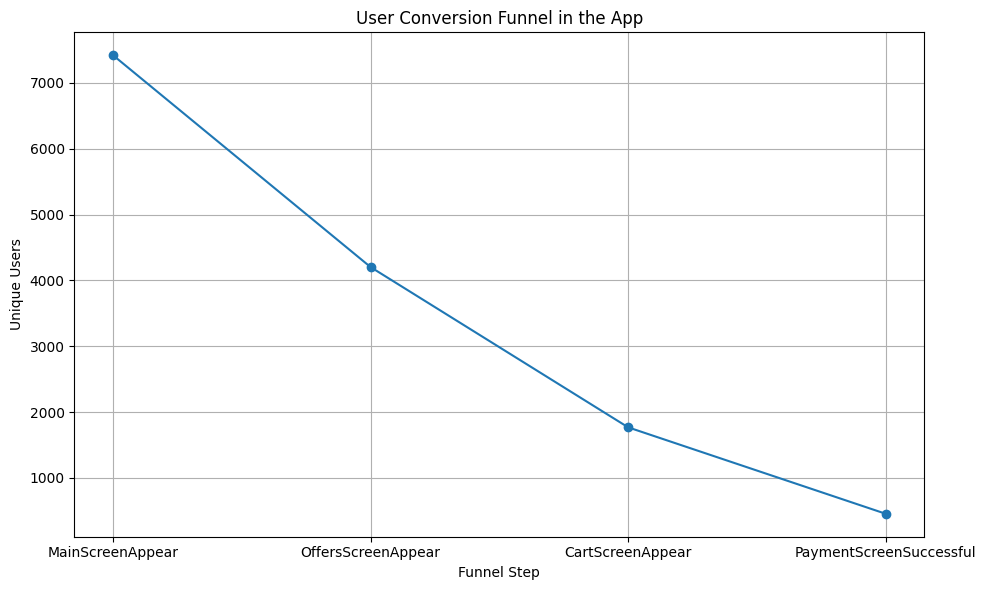

In [99]:
# Step names
steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Unique users at each step (computed above)
users_per_step = [n_main, n_offers, n_cart, n_payment]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(steps, users_per_step, marker='o')
plt.title('User Conversion Funnel in the App')
plt.xlabel('Funnel Step')
plt.ylabel('Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()


**What I did:**

•	Built a line chart to visually represent the conversion funnel.

•	Used sequential funnel figures (correct order), with actual user counts following MainScreenAppear → OffersScreenAppear → CartScreenAppear → PaymentScreenSuccessful.


•	The chart is based on unique users at each step, respecting order and time.



**What we can conclude:**

•	The chart shows a sharp, continuous decline, especially:

o	from OffersScreenAppear to CartScreenAppear (over half drop),

o	and from CartScreenAppear to PaymentScreenSuccessful (even steeper).

•	The progressively descending line underscores low end-to-end conversion, with only a small fraction completing purchase.

•	This view clearly surfaces the bottleneck at payment, where the largest relative loss occurs.


•	The checkout journey faces difficulties in later stages; most users abandon before completing payment.


###  4.5 – Visualizar o funil de conversão dos usuários com gráfico de funil horizontal

In [100]:
%pip install plotly>=5


Note: you may need to restart the kernel to use updated packages.


In [101]:
# If Plotly isn't installed, uncomment the next line in notebooks that support %pip:
# %pip install -q "plotly>=5"

import plotly.io as pio
import plotly.graph_objects as go

# Renderer for Jupyter/Colab; adjust if needed (e.g., "notebook", "colab", "vscode")
# pio.renderers.default = "notebook_connected"

# Use the counts already computed above; if you prefer hard-coded numbers, swap for [7419, 4201, 1767, 454].
steps = ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]
values = [n_main, n_offers, n_cart, n_payment]

try:
    fig = go.Figure(go.Funnel(
        y=steps,
        x=values,
        textinfo="value+percent initial"
    ))
    fig.update_layout(title='User Conversion Funnel in the App')
    fig.show()
except Exception as e:
    # Fallback in case an older Plotly version doesn't support go.Funnel
    print("Plotly Funnel failed, falling back to a bar chart. Error was:", e)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.bar(steps, values)
    plt.title('User Conversion Funnel in the App (fallback)')
    plt.xlabel('Funnel Step')
    plt.ylabel('Unique Users')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**What I did:**

Created a horizontal funnel chart using plotly.graph_objects to show the number of unique users at each step in order. Values reflect users who completed each event in sequence, with both absolute counts and percentage of initial.


**What we can conclude:**

•	Highest concentration is at the first step: 7,419 viewed the main screen.

•	Only 56.6% proceeded to the offers screen — a notable early drop.

•	Conversion from offers to cart declines further: just 42.1% of those who saw offers reached the cart.

•	Biggest bottleneck is cart → payment: only 25.7% of cart users complete purchase, i.e., 6.1% overall conversion from the first screen.

•	The visual reinforces clear optimisation opportunities, mainly in checkout/payment where abandonment is most acute.



## 5.0 Study the experiment results

In this step, we test whether there were significant behavioural differences across the three groups in the A/A/B experiment.

•	Groups 246 and 247: control (A/A)

•	Group 248: variant, with a new font in the app

We will test whether users behaved differently by group, analysing:

•	Event frequencies

•	Per-event conversions


•	Proportions (hypothesis tests)

### 5.1 – Compare number of events per user across groups


In [102]:
# First, assess average engagement by group
# Metric: total number of events divided by number of unique users
events_per_group = filtered_data.groupby('exp_id')['event_name'].count().reset_index()
events_per_group.columns = ['exp_id', 'total_events']

# Total users per group (redoing for consistency)
users_per_group = filtered_data.groupby('exp_id')['user_id'].nunique().reset_index()
users_per_group.columns = ['exp_id', 'unique_users']

# Join the two metrics
group_comparison = pd.merge(events_per_group, users_per_group, on='exp_id')

# Compute average events per user
group_comparison['events_per_user'] = group_comparison['total_events'] / group_comparison['unique_users']
print(group_comparison)

   exp_id  total_events  unique_users  events_per_user
0     246         79425          2484        31.974638
1     247         77147          2513        30.699164
2     248         84726          2537        33.396137


**Interpretation:**

The three groups have similar averages of events per user. This is a good sign that overall engagement is balanced across groups before statistical testing.


In [103]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st


# Use consistent variable name (data_filtrada in Portuguese → filtered_data in English)
alpha = 0.05
events_unique = filtered_data['event_name'].unique()
alpha_corrected = alpha / len(events_unique)  # Bonferroni correction

# H0 (null hypothesis): The proportions of users who performed each event are equal between groups 246 and 247
# H1 (alternative hypothesis): The proportions are different

users_246 = filtered_data[filtered_data['exp_id'] == 246]['user_id'].nunique()
users_247 = filtered_data[filtered_data['exp_id'] == 247]['user_id'].nunique()

relative_difference = abs(users_246 - users_247) / ((users_246 + users_247) / 2)
print(f"Relative difference between A/A groups: {relative_difference:.2%}")

# A/A test
results_aa = []

for event in events_unique:
    success_246 = filtered_data[
        (filtered_data['exp_id'] == 246) & (filtered_data['event_name'] == event)
    ]['user_id'].nunique()
    success_247 = filtered_data[
        (filtered_data['exp_id'] == 247) & (filtered_data['event_name'] == event)
    ]['user_id'].nunique()
    
    p1 = success_246 / users_246
    p2 = success_247 / users_247
    p_comb = (success_246 + success_247) / (users_246 + users_247)
    diff = p1 - p2

    z = diff / mth.sqrt(p_comb * (1 - p_comb) * (1/users_246 + 1/users_247))
    p_value = (1 - st.norm(0, 1).cdf(abs(z))) * 2

    results_aa.append({
        'event': event,
        'p_group_246': round(p1, 4),
        'p_group_247': round(p2, 4),
        'difference': round(diff, 4),
        'p_value': round(p_value, 4),
        'significant': 'Yes' if p_value < alpha_corrected else 'No'
    })

df_aa_results = pd.DataFrame(results_aa).sort_values(by='p_value').reset_index(drop=True)
print(df_aa_results)



Relative difference between A/A groups: 1.16%
                     event  p_group_246  p_group_247  difference  p_value  \
0  PaymentScreenSuccessful       0.4831       0.4608      0.0223   0.1146   
1         CartScreenAppear       0.5097       0.4926      0.0170   0.2288   
2       OffersScreenAppear       0.6208       0.6049      0.0159   0.2481   
3         MainScreenAppear       0.9863       0.9853      0.0010   0.7571   
4                 Tutorial       0.1119       0.1126     -0.0007   0.9377   

  significant  
0          No  
1          No  
2          No  
3          No  
4          No  


**A/A test conclusion:**

Differences between groups 246 and 247 are not statistically significant for any event, even before correction. This validates the control split and confirms the experiment framework is functioning correctly (successful A/A test).

 ### 5.3 – A/B test: compare the variant group (248) with control groups
#### 5.3.1 – Compare 248 (variant) vs 246 (control)


In [104]:
ab_results_248_246 = []
# H₀: the proportions of users who performed the event are equal across groups
# H₁: the proportions differ
# Two-proportion z-test with Bonferroni correction

for event in events_unique:
    success_248 = filtered_data[(filtered_data['exp_id'] == 248) & (filtered_data['event_name'] == event)]['user_id'].nunique()
    success_246 = filtered_data[(filtered_data['exp_id'] == 246) & (filtered_data['event_name'] == event)]['user_id'].nunique()
    
    total_248 = filtered_data[filtered_data['exp_id'] == 248]['user_id'].nunique()
    total_246 = filtered_data[filtered_data['exp_id'] == 246]['user_id'].nunique()
    
    p1 = success_248 / total_248
    p2 = success_246 / total_246
    p_comb = (success_248 + success_246) / (total_248 + total_246)
    diff = p1 - p2

    z = diff / np.sqrt(p_comb * (1 - p_comb) * (1/total_248 + 1/total_246))
    p_value = (1 - st.norm(0, 1).cdf(abs(z))) * 2

    ab_results_248_246.append({
        'event': event,
        'p_group_248': round(p1, 4),
        'p_group_246': round(p2, 4),
        'difference': round(diff, 4),
        'p_value': round(p_value, 4),
        'significant': 'Yes' if p_value < alpha_corrected else 'No'
    })

df_ab_248_246 = pd.DataFrame(ab_results_248_246).sort_values(by='p_value').reset_index(drop=True)
print(df_ab_248_246)


                     event  p_group_248  p_group_246  difference  p_value  \
0         CartScreenAppear       0.4848       0.5097     -0.0248   0.0784   
1       OffersScreenAppear       0.6035       0.6208     -0.0173   0.2084   
2  PaymentScreenSuccessful       0.4655       0.4831     -0.0176   0.2123   
3         MainScreenAppear       0.9827       0.9863     -0.0037   0.2950   
4                 Tutorial       0.1100       0.1119     -0.0019   0.8264   

  significant  
0          No  
1          No  
2          No  
3          No  
4          No  


**Conclusion of the comparison:**

No statistically significant differences were found between group 248 and group 246/247. This indicates that the new font did not affect user behaviour for the events analysed. Therefore, the change can be considered safe to roll out.



####  5.3.2 – Compare 248 (variant) vs 247 (control)

In [105]:
ab_results_248_247 = []

for event in events_unique:
    success_248 = filtered_data[(filtered_data['exp_id'] == 248) & (filtered_data['event_name'] == event)]['user_id'].nunique()
    success_247 = filtered_data[(filtered_data['exp_id'] == 247) & (filtered_data['event_name'] == event)]['user_id'].nunique()
    
    total_248 = filtered_data[filtered_data['exp_id'] == 248]['user_id'].nunique()
    total_247 = filtered_data[filtered_data['exp_id'] == 247]['user_id'].nunique()
    
    p1 = success_248 / total_248
    p2 = success_247 / total_247
    p_comb = (success_248 + success_247) / (total_248 + total_247)
    diff = p1 - p2

    z = diff / np.sqrt(p_comb * (1 - p_comb) * (1/total_248 + 1/total_247))
    p_value = (1 - st.norm(0, 1).cdf(abs(z))) * 2

    ab_results_248_247.append({
        'event': event,
        'p_group_248': round(p1, 4),
        'p_group_247': round(p2, 4),
        'difference': round(diff, 4),
        'p_value': round(p_value, 4),
        'significant': 'Yes' if p_value < alpha_corrected else 'No'
    })

df_ab_248_247 = pd.DataFrame(ab_results_248_247).sort_values(by='p_value').reset_index(drop=True)
print(df_ab_248_247)

                     event  p_group_248  p_group_247  difference  p_value  \
0         MainScreenAppear       0.9827       0.9853     -0.0026   0.4587   
1         CartScreenAppear       0.4848       0.4926     -0.0078   0.5786   
2  PaymentScreenSuccessful       0.4655       0.4608      0.0047   0.7373   
3                 Tutorial       0.1100       0.1126     -0.0026   0.7653   
4       OffersScreenAppear       0.6035       0.6049     -0.0014   0.9198   

  significant  
0          No  
1          No  
2          No  
3          No  
4          No  


**What I did:**

•	Analysed user behaviour across the three experimental groups based on app events.

•	Computed average events per user to assess engagement per group.

•	Compared the proportions of users performing each event across control and variant groups.

•	Applied two-proportion z-tests to assess statistical differences.

•	Used Bonferroni correction to adjust the significance level, reducing false positives from multiple comparisons.


**What we can conclude:**

•	Groups showed very similar engagement levels, with close averages of events per user.

•	Control vs control (A/A) showed no statistically significant differences, validating the balanced split.

•	The variant group (248) showed no meaningful changes versus controls.

•	No negative or positive impact from the font change, suggesting it is safe to implement.


### 5.4 – Compare the variant (248) with combined controls (246 and 247)

In [106]:
# Combine control groups: 246 + 247
control_ids = [246, 247]
test_id = 248

ab_results_248_control = []

for event in events_unique:
    success_control = filtered_data[(filtered_data['exp_id'].isin(control_ids)) & (filtered_data['event_name'] == event)]['user_id'].nunique()
    success_test = filtered_data[(filtered_data['exp_id'] == test_id) & (filtered_data['event_name'] == event)]['user_id'].nunique()

    total_control = filtered_data[filtered_data['exp_id'].isin(control_ids)]['user_id'].nunique()
    total_test = filtered_data[filtered_data['exp_id'] == test_id]['user_id'].nunique()

    p1 = success_test / total_test
    p2 = success_control / total_control
    p_comb = (success_test + success_control) / (total_test + total_control)
    diff = p1 - p2

    z = diff / np.sqrt(p_comb * (1 - p_comb) * (1/total_test + 1/total_control))
    p_value = (1 - st.norm(0, 1).cdf(abs(z))) * 2

    ab_results_248_control.append({
        'event': event,
        'p_group_248': round(p1, 4),
        'p_group_control': round(p2, 4),
        'difference': round(diff, 4),
        'p_value': round(p_value, 4),
        'significant': 'Yes' if p_value < alpha_corrected else 'No'
    })

df_ab_248_control = pd.DataFrame(ab_results_248_control).sort_values(by='p_value').reset_index(drop=True)
print(df_ab_248_control)


                     event  p_group_248  p_group_control  difference  p_value  \
0         CartScreenAppear       0.4848           0.5011     -0.0163   0.1818   
1         MainScreenAppear       0.9827           0.9858     -0.0031   0.2942   
2       OffersScreenAppear       0.6035           0.6128     -0.0093   0.4343   
3  PaymentScreenSuccessful       0.4655           0.4719     -0.0064   0.6004   
4                 Tutorial       0.1100           0.1123     -0.0023   0.7649   

  significant  
0          No  
1          No  
2          No  
3          No  
4          No  


### 5.5 – Statistical conclusion and thoughts on the significance level

In [107]:
# Notes on multiple testing

alpha = 0.05
total_tests = len(events_unique) * 3  # 3 comparisons: A/A, A/B1, A/B2

print(f"Original significance level: α = {alpha}")
print(f"Total tests performed: {total_tests}")
print(f"Bonferroni-corrected alpha: {alpha / len(events_unique):.4f}")

print("""
Interpretation:
Running multiple comparisons increases the chance of false positives (Type I error).

Therefore, we applied the Bonferroni correction to make our tests more conservative.

Even so, none of the comparisons were statistically significant — strengthening our confidence that the new font **does not negatively impact** users' experience.
""")

Original significance level: α = 0.05
Total tests performed: 15
Bonferroni-corrected alpha: 0.0100

Interpretation:
Running multiple comparisons increases the chance of false positives (Type I error).

Therefore, we applied the Bonferroni correction to make our tests more conservative.

Even so, none of the comparisons were statistically significant — strengthening our confidence that the new font **does not negatively impact** users' experience.



**What I did:**

•	Compared the variant group (248, new font) with the combined controls (246 & 247).

•	For each event, computed the proportion of users performing it in test vs combined control.

•	Applied two-proportion z-tests and Bonferroni correction for multiple testing.

•	Calculated and interpreted p-values for each event with adjusted alpha.

•	Evaluated Type I error risk and justified the corrected alpha based on total tests.

•	Concluded that none of the events showed significant differences even under a conservative approach.


**What we can conclude:**

•	No statistically significant differences were identified between the variant and combined controls.

•	The new font did not negatively affect any of the analysed events.


•	Lack of significance persisted after Bonferroni correction.

•	This indicates a well-designed experiment and reliable results.


•	Based on the data, the visual change (new font) can be rolled out safely as it does not harm the user journey.

## 6.0 – Final project conclusions


**What I did:**

•	Read and prepared raw app event logs from a food-sector startup.

•	Identified initial inconsistencies and fixed the file format to ensure well-defined columns.


•	Carried out careful pre-processing: standardised column names, converted timestamps, and created useful temporal columns.

•	Filtered the dataset to consider only the reliable analysis period (from 1 August 2019).


•	Analysed the distribution of events and experimental groups (A/A/B), ensuring balance and validity.

•	Modelled the conversion funnel respecting chronological order and computed step-wise conversion rates.


•	Visualised the funnel with a line chart and a horizontal funnel to highlight bottlenecks.

•	Ran hypothesis tests across experimental groups (two-proportion z-tests), including:


o	A/A test (between control groups)

o	A/B tests (group 248 compared with 246, 247, and both combined)


•	Applied Bonferroni correction for multiple comparisons and assessed statistical significance conservatively.


**What we can conclude:**

•	The experiment was correctly configured with balanced groups in size and initial behaviour.

•	The funnel shows a severe bottleneck at payment, with only 6.1% total conversion — a clear target for improvement.


•	The A/A test indicates control groups behave equivalently, validating experimental integrity.

•	Comparisons between the variant (new font) and controls (individual and combined) show no statistically significant differences.


•	Even under a conservative approach (Bonferroni), there is no meaningful impact from the new font on user behaviour.

•	Therefore, the visual change can be implemented safely, as it does not harm navigation or conversion.


•	Future optimisation should focus on the payment stage, where most drop-offs occur.

**Next steps suggested:**

•	Investigate why so many users abandon at payment.

•	Run A/B tests focusing on checkout flow changes (e.g., simplification, payment methods, visual feedback).


•	Assess the impact of other visual elements beyond the font, such as colours or button positioning.



